In [1]:
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar
from matplotlib.animation import FuncAnimation

import seaborn as sns

from matplotlib import rc
import yaml
import os

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5') # conda create -n newenv -c conda-forge ffmpeg

with open("cal-settings.yml", 'r') as file:
    vars = yaml.safe_load(file)
    RX_TX_SAME_CHANNEL = vars["RX_TX_SAME_CHANNEL"]

print("Cable connections")
if RX_TX_SAME_CHANNEL:
    REF_RX_CH = FREE_TX_CH = 0
    LOOPBACK_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH0 RX\nCH1 TX-->CH1 RX\nCH0 TX -->")
else:
    LOOPBACK_RX_CH = FREE_TX_CH = 0
    REF_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH1 RX\nCH1 TX-->CH0 RX\nCH0 TX -->")

ref_rx = f"rx_ch{REF_RX_CH}"

Cable connections

PLL REF-->CH1 RX
CH1 TX-->CH0 RX
CH0 TX -->


In [6]:
scope_file_800 = f"data_scope_20240613060429.txt" # at 800Mz
scope_file_400 = f"data_scope_20240613131244.txt"  # at 400Mz

scope_file_4 = f"data_scope_20240613134255.txt" # at 4GHz

In [7]:
scope_df_800 = pd.read_csv(
    scope_file_800,
    names=["meas_id", "phase_diff", "phase_diff_13", "phase_diff_23"],
    header=None,
    sep=r"\s+",
)


scope_df_800.loc[:, "phase_diff"] = (scope_df_800["phase_diff"] + 180) % 360 - 180


scope_df_400 = pd.read_csv(
    scope_file_400,
    names=["meas_id", "phase_diff", "phase_diff_13", "phase_diff_23"],
    header=None,
    sep=r"\s+",
)


scope_df_400.loc[:, "phase_diff"] = (scope_df_400["phase_diff"] + 180) % 360 - 180


scope_df_4 = pd.read_csv(
    scope_file_4,
    names=["meas_id", "phase_diff", "phase_diff_13", "phase_diff_23"],
    header=None,
    sep=r"\s+",
)


scope_df_4.loc[:, "phase_diff"] = (scope_df_4["phase_diff"] + 180) % 360 - 180

Check the absolute measured loopback check per USRP. This means read the measured phase after the first phase calibration (i.e., transmitting with $-(\phi_{rx}+\phi_{tx})$).

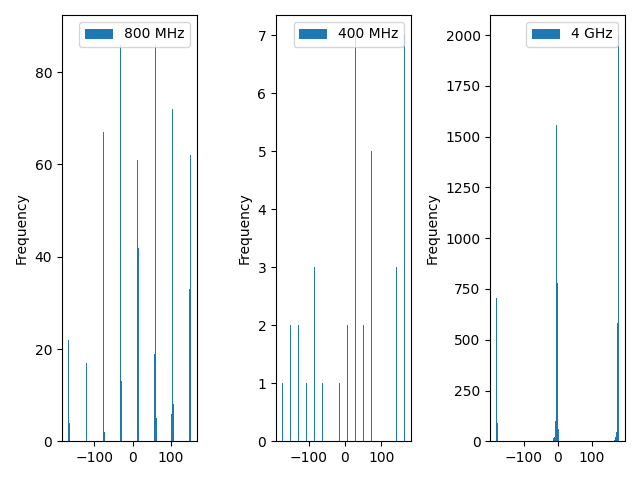

In [20]:
bins = 180
figs, axs = plt.subplots(1, 3)
scope_df_800["phase_diff"].plot.hist(bins=bins, label="800 MHz", ax=axs[0])
axs[0].legend()
scope_df_400["phase_diff"].plot.hist(bins=bins, label="400 MHz", ax=axs[1])
axs[1].legend()
scope_df_4["phase_diff"].plot.hist(bins=bins, label="4 GHz", ax=axs[2])
axs[2].legend()
plt.tight_layout()
plt.show()